In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

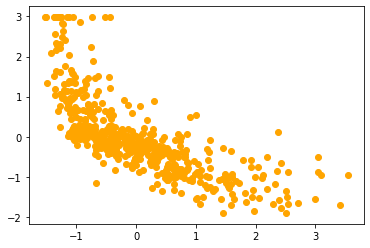

In [2]:
data = pd.read_csv('./data/boston_housing.csv')
scaler = StandardScaler()

data = data.dropna()

X = data['lstat'].values
X = X.reshape(-1, 1)
X = scaler.fit_transform(X)

y = data['medv'].values
y = y.reshape(-1, 1)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

plt.scatter(x = X, y = y, color='orange')
plt.show()

## Momentum Optimizer

In [3]:
class MyMomentumOptimizer():
    def __init__(self, learning_rate, momentum = 0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        
        self.w = 0
        self.b = 0
        
        self.momentum_vector_w = 0 
        self.momentum_vector_b = 0
    
    def _get_batch(self, X, y, batch_size):
        indexes = np.random.randint(len(X), size=batch_size)
        return X[indexes,:], y[indexes,:]
    
    def _get_momentum_vector(self, X_batch, y_batch):
        f = y_batch - (self.w * X_batch + self.b)
        
        self.momentum_vector_w = self.momentum * self.momentum_vector_w + \
                                 self.learning_rate * (-2 * X_batch.dot(f.T).sum() / len(X_batch))
        self.momentum_vector_b = self.momentum * self.momentum_vector_b + \
                                 self.learning_rate * (-2 * f.sum() / len(X_batch))
    
    def fit(self, X, y, batch_size = 32, epochs = 100):
        history = []
        
        for e in range(epochs):
            
            indexes = np.random.randint(len(X), size=batch_size)
            X_batch, y_batch = self._get_batch(X, y, batch_size)
            
            self._get_momentum_vector(X_batch, y_batch)
            
            self.w -= self.momentum_vector_w
            self.b -= self.momentum_vector_b
        
            loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)

        return history
                
    def predict(self, X):
        return self.w * X + self.b

In [4]:
model = MyMomentumOptimizer(learning_rate = 0.0001)
history = model.fit(X_train, y_train, batch_size = 128, epochs = 1000)

predictions = model.predict(X_test)

Epoch: 0, Loss: 1.0493256921239755)
Epoch: 100, Loss: 0.7498717265163866)
Epoch: 200, Loss: 0.7107958458608861)
Epoch: 300, Loss: 0.6835502756021743)
Epoch: 400, Loss: 0.332389167489161)
Epoch: 500, Loss: 0.4480004970560476)
Epoch: 600, Loss: 0.4485807091678201)
Epoch: 700, Loss: 0.4654043934128161)
Epoch: 800, Loss: 0.44872421210765934)
Epoch: 900, Loss: 0.3816051764475844)


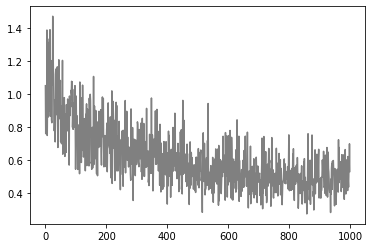

In [5]:
plt.plot(history, color='gray')

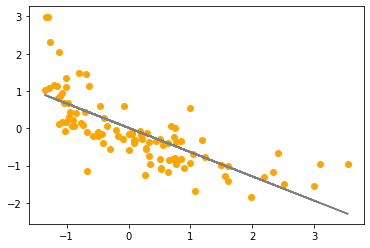

In [6]:
plt.scatter(x = X_test, y = y_test, color='orange')
values = np.column_stack((X_test, predictions))
plt.plot(values[:, 0], values[:, 1], color='gray')

plt.show()

In [7]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'Momentum Model Prediction': predictions.flatten(),
})

,Actual Value,Momentum Model Prediction
0,-0.221246,-0.468916
1,-1.842924,-1.274906
2,-0.993992,-0.957616
3,-1.081062,-0.333065
4,-0.145059,0.295134
...,...,...
97,0.268523,0.271428
98,-0.330083,-0.535474
99,-0.286548,-0.319388
100,-0.776317,-0.789853


## Nesterov Accelerated Gradient


In [8]:
class MyNestrovAcceleratedGradient():
    def __init__(self, learning_rate, momentum = 0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        
        self.w = 0
        self.b = 0
        
        self.momentum_vector_w = 0 
        self.momentum_vector_b = 0
    
    def _get_batch(self, X, y, batch_size):
        indexes = np.random.randint(len(X), size=batch_size)
        return X[indexes,:], y[indexes,:]
    
    def _get_momentum_vector(self, X_batch, y_batch):
        f = y_batch - ((self.w + self.momentum * self.momentum_vector_w) * X_batch + (self.momentum * self.momentum_vector_b))
        
        self.momentum_vector_w = self.momentum * self.momentum_vector_w + \
                                 self.learning_rate * (-2 * X_batch.dot(f.T).sum() / len(X_batch))
        
        self.momentum_vector_b = self.momentum * self.momentum_vector_b + \
                                 self.learning_rate * (-2 * f.sum() / len(X_batch))
    
    def fit(self, X, y, batch_size = 32, epochs = 100):
        history = []
        momentum_vector = np.zeros_like(1)
        
        for e in range(epochs):
            
            indexes = np.random.randint(len(X), size=batch_size)
            X_batch, y_batch = self._get_batch(X, y, batch_size)
            
            self._get_momentum_vector(X_batch, y_batch)
            
            self.w -= self.momentum_vector_w
            self.b -= self.momentum_vector_b
        
            loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)

        return history
                
    def predict(self, X):
        return self.w * X + self.b

In [9]:
model = MyNestrovAcceleratedGradient(learning_rate = 0.0001)
history = model.fit(X_train, y_train, batch_size = 128, epochs = 1000)

predictions = model.predict(X_test)

Epoch: 0, Loss: 1.0428307224941038)
Epoch: 100, Loss: 0.7708240506795851)
Epoch: 200, Loss: 0.9109097502153849)
Epoch: 300, Loss: 0.576534368060239)
Epoch: 400, Loss: 0.3422810954841916)
Epoch: 500, Loss: 0.556215628177696)
Epoch: 600, Loss: 0.35335516341041334)
Epoch: 700, Loss: 0.39640988193508453)
Epoch: 800, Loss: 0.5852076539641191)
Epoch: 900, Loss: 0.5284027213990843)


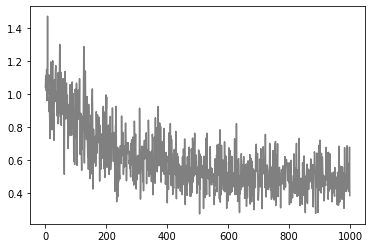

In [10]:
plt.plot(history, color='gray')

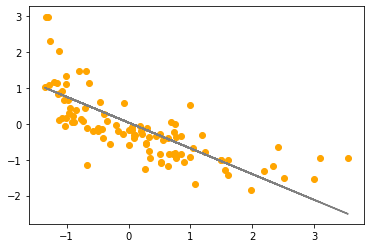

In [11]:
plt.scatter(x = X_test, y = y_test, color='orange')
values = np.column_stack((X_test, predictions))
plt.plot(values[:, 0], values[:, 1], color='gray')

plt.show()

In [12]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'Momentum Model Prediction': predictions.flatten(),
})

,Actual Value,Momentum Model Prediction
0,-0.221246,-0.493369
1,-1.842924,-1.382603
2,-0.993992,-1.032543
3,-1.081062,-0.343487
4,-0.145059,0.349593
...,...,...
97,0.268523,0.323439
98,-0.330083,-0.566801
99,-0.286548,-0.328398
100,-0.776317,-0.847453


## AdaGrad

In [13]:
class MyAdaGrad():
    def __init__(self, learning_rate, epsilon = 10 ** -10):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        
        self.w = 0
        self.b = 0
        
        self.scale_w = 0
        self.scale_b = 0
    
    def _get_batch(self, X, y, batch_size):
        indexes = np.random.randint(len(X), size=batch_size)
        return X[indexes,:], y[indexes,:]
    
    def _get_scale(self, X_batch, y_batch):
        f = y_batch - (self.w * X_batch + self.b)
        
        gradient_w = (-2 * X_batch.dot(f.T).sum() / len(X_batch))
        gradient_b = (-2 * f.sum() / len(X_batch))
        
        self.scale_w += np.multiply(gradient_w, gradient_w)
        self.scale_b += np.multiply(gradient_b, gradient_b)
    
    def fit(self, X, y, batch_size = 32, epochs = 100):
        history = []
        momentum_vector = np.zeros_like(1)
        
        for e in range(epochs):
            
            indexes = np.random.randint(len(X), size=batch_size)
            X_batch, y_batch = self._get_batch(X, y, batch_size)
            
            self._get_scale(X_batch, y_batch)
            
            f = y_batch - (self.w * X_batch + self.b)
            
            divider_w = np.sqrt(self.scale_w + self.epsilon) 
            divider_b = np.sqrt(self.scale_b + self.epsilon)
            
            gradient_w = (-2 * X_batch.dot(f.T).sum() / len(X_batch))
            gradient_b = (-2 * f.sum() / len(X_batch))
            
            self.w -= self.learning_rate * gradient_w / divider_w
            self.b -= self.learning_rate * gradient_b / divider_b
        
            loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)

        return history
                
    def predict(self, X):
        return self.w * X + self.b

In [28]:
model = MyAdaGrad(learning_rate = 0.1)
history = model.fit(X_train, y_train, batch_size = 128, epochs = 1000)

predictions = model.predict(X_test)

Epoch: 0, Loss: 0.7979041986313373)
Epoch: 100, Loss: 0.5538556882638777)
Epoch: 200, Loss: 0.47179562048530943)
Epoch: 300, Loss: 0.6090468657219893)
Epoch: 400, Loss: 0.29050695867780074)
Epoch: 500, Loss: 0.3170492333098174)
Epoch: 600, Loss: 0.5305147131291987)
Epoch: 700, Loss: 0.45605887968605396)
Epoch: 800, Loss: 0.4405627012256315)
Epoch: 900, Loss: 0.6149532862507887)


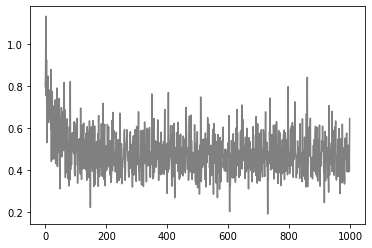

In [29]:
plt.plot(history, color='gray')

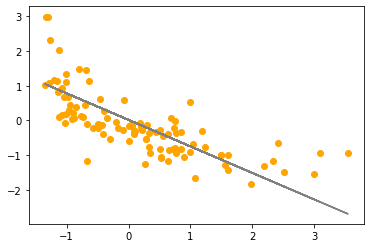

In [30]:
plt.scatter(x = X_test, y = y_test, color='orange')
values = np.column_stack((X_test, predictions))
plt.plot(values[:, 0], values[:, 1], color='gray')

plt.show()

In [17]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'Momentum Model Prediction': predictions.flatten(),
})

,Actual Value,Momentum Model Prediction
0,-0.221246,-0.579675
1,-1.842924,-1.571306
2,-0.993992,-1.180935
3,-1.081062,-0.412534
4,-0.145059,0.360355
...,...,...
97,0.268523,0.331189
98,-0.330083,-0.661563
99,-0.286548,-0.395707
100,-0.776317,-0.974533


## RMSProp

In [18]:
class MyRMSProp():
    def __init__(self, learning_rate, decay_rate = 0.9, epsilon = 10 ** -10):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.decay_rate = decay_rate
        
        self.w = 0
        self.b = 0
        
        self.scale_w = 0
        self.scale_b = 0
    
    def _get_batch(self, X, y, batch_size):
        indexes = np.random.randint(len(X), size=batch_size)
        return X[indexes,:], y[indexes,:]
    
    def _get_scale(self, X_batch, y_batch):
        f = y_batch - (self.w * X_batch + self.b)
        
        gradient_w = (-2 * X_batch.dot(f.T).sum() / len(X_batch))
        gradient_b = (-2 * f.sum() / len(X_batch))
        
        self.scale_w = self.decay_rate * self.scale_w + (1 - self.decay_rate) * np.multiply(gradient_w, gradient_w)
        self.scale_b = self.decay_rate * self.scale_b + (1 - self.decay_rate) * np.multiply(gradient_b, gradient_b)
    
    def fit(self, X, y, batch_size = 32, epochs = 100):
        history = []
        momentum_vector = np.zeros_like(1)
        
        for e in range(epochs):
            
            indexes = np.random.randint(len(X), size=batch_size)
            X_batch, y_batch = self._get_batch(X, y, batch_size)
            
            self._get_scale(X_batch, y_batch)
            
            f = y_batch - (self.w * X_batch + self.b)
            
            divider_w = np.sqrt(self.scale_w + self.epsilon) 
            divider_b = np.sqrt(self.scale_b + self.epsilon)
            
            gradient_w = (-2 * X_batch.dot(f.T).sum() / len(X_batch))
            gradient_b = (-2 * f.sum() / len(X_batch))
            
            self.w -= self.learning_rate * gradient_w / divider_w
            self.b -= self.learning_rate * gradient_b / divider_b
        
            loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)

        return history
                
    def predict(self, X):
        return self.w * X + self.b

In [19]:
model = MyRMSProp(learning_rate = 0.01)
history = model.fit(X_train, y_train, batch_size = 128, epochs = 2000)

predictions = model.predict(X_test)

Epoch: 0, Loss: 1.0067302568004783)
Epoch: 100, Loss: 0.5548727653729529)
Epoch: 200, Loss: 0.4650584261906152)
Epoch: 300, Loss: 0.5603081231881148)
Epoch: 400, Loss: 0.6147792885402231)
Epoch: 500, Loss: 0.5129763511682113)
Epoch: 600, Loss: 0.591699424069597)
Epoch: 700, Loss: 0.5413949069489516)
Epoch: 800, Loss: 0.5215547915706193)
Epoch: 900, Loss: 0.48122559852723423)
Epoch: 1000, Loss: 0.497310753056444)
Epoch: 1100, Loss: 0.38403636517387396)
Epoch: 1200, Loss: 0.3829499207052695)
Epoch: 1300, Loss: 0.4287416366915751)
Epoch: 1400, Loss: 0.48688055753943527)
Epoch: 1500, Loss: 0.41232863743069914)
Epoch: 1600, Loss: 0.3436122983294806)
Epoch: 1700, Loss: 0.4730678956784552)
Epoch: 1800, Loss: 0.4586441383688593)
Epoch: 1900, Loss: 0.4893198589718893)


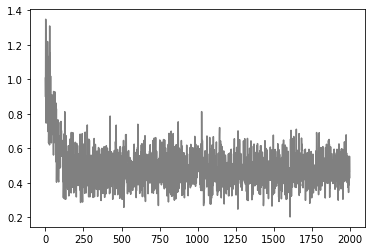

In [20]:
plt.plot(history, color='gray')

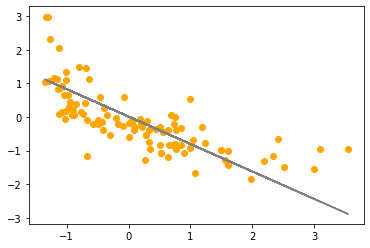

In [21]:
plt.scatter(x = X_test, y = y_test, color='orange')
values = np.column_stack((X_test, predictions))
plt.plot(values[:, 0], values[:, 1], color='gray')

plt.show()

In [22]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'Momentum Model Prediction': predictions.flatten(),
})

,Actual Value,Momentum Model Prediction
0,-0.221246,-0.589794
1,-1.842924,-1.602231
2,-0.993992,-1.203670
3,-1.081062,-0.419145
4,-0.145059,0.369960
...,...,...
97,0.268523,0.340182
98,-0.330083,-0.673400
99,-0.286548,-0.401966
100,-0.776317,-0.992936


## Adam

In [23]:
class MyAdam():
    def __init__(self, learning_rate, momentum_decay = 0.9, scaling_decay = 0.95, epsilon = 10 ** -8):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.momentum_decay = momentum_decay
        self.scaling_decay = scaling_decay
        self.w = 0
        self.b = 0
        self.scale_w = 0
        self.scale_b = 0
        self.momentum_vector_w = 0 
        self.momentum_vector_b = 0
    
    def _get_batch(self, X, y, batch_size):
        indexes = np.random.randint(len(X), size=batch_size)
        return X[indexes,:], y[indexes,:]
    
    def _get_gradients(self, X_batch, y_batch):
        f = y_batch - (self.w * X_batch + self.b)
        
        gradient_w = (-2 * X_batch.dot(f.T).sum() / len(X_batch))
        gradient_b = (-2 * f.sum() / len(X_batch))
        
        return gradient_w, gradient_b
    
    def _get_momentum_vector(self, X_batch, y_batch, gradient_w, gradient_b, epoch):
        self.momentum_vector_w = self.momentum_decay * self.momentum_vector_w + (1 - self.momentum_decay) * gradient_w
        self.momentum_vector_b = self.momentum_decay * self.momentum_vector_b + (1 - self.momentum_decay) * gradient_b
        
        self.momentum_vector_w = self.momentum_vector_w / (1 - self.momentum_decay**epoch)
        self.momentum_vector_b = self.momentum_vector_b / (1 - self.momentum_decay**epoch)
    
    def _get_scale(self, X_batch, y_batch, gradient_w, gradient_b, epoch):
        self.scale_w = self.scaling_decay * self.scale_w + (1 - self.scaling_decay) * np.multiply(gradient_w, gradient_w)
        self.scale_b = self.scaling_decay * self.scale_b + (1 - self.scaling_decay) * np.multiply(gradient_b, gradient_b)
        
        self.scale_w = self.scale_w / (1 - self.scaling_decay**epoch)
        self.scale_b = self.scale_b / (1 - self.scaling_decay**epoch)
        
    def fit(self, X, y, batch_size = 32, epochs = 100):
        history = []
        momentum_vector = np.zeros_like(1)
        
        for e in range(epochs):
            
            indexes = np.random.randint(len(X), size=batch_size)
            X_batch, y_batch = self._get_batch(X, y, batch_size)
            
            gradient_w, gradient_b = self._get_gradients(X_batch, y_batch)

            self._get_scale(X_batch, y_batch, gradient_w, gradient_b, e + 1)
            self._get_momentum_vector(X_batch, y_batch,gradient_w, gradient_b, e + 1)
            
            divider_w = np.sqrt(self.scale_w + self.epsilon) 
            divider_b = np.sqrt(self.scale_b + self.epsilon)
            
            self.w -= self.learning_rate * self.momentum_vector_w * gradient_w / divider_w
            self.b -= self.learning_rate * self.momentum_vector_b * gradient_b / divider_b
            
            loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)

        return history
                
    def predict(self, X):
        return self.w * X + self.b

In [24]:
model = MyAdam(learning_rate = 0.001)
history = model.fit(X_train, y_train, batch_size = 32, epochs = 2000)

predictions = model.predict(X_test)

Epoch: 0, Loss: 1.6016804863141227)
Epoch: 100, Loss: 1.0708601616598528)
Epoch: 200, Loss: 0.8396258429842761)
Epoch: 300, Loss: 0.9498729862073851)
Epoch: 400, Loss: 1.422709838725747)
Epoch: 500, Loss: 0.951641965926126)
Epoch: 600, Loss: 0.5114273687678832)
Epoch: 700, Loss: 0.9474342613915748)
Epoch: 800, Loss: 0.18370682522157994)
Epoch: 900, Loss: 0.551880807891246)
Epoch: 1000, Loss: 0.8319923072193909)
Epoch: 1100, Loss: 0.47982450339753563)
Epoch: 1200, Loss: 0.6607618450191821)
Epoch: 1300, Loss: 0.5550136613614162)
Epoch: 1400, Loss: 0.3261014705384321)
Epoch: 1500, Loss: 0.8596159351953009)
Epoch: 1600, Loss: 0.4764163861345504)
Epoch: 1700, Loss: 0.4233869971005261)
Epoch: 1800, Loss: 0.8254322188333079)
Epoch: 1900, Loss: 0.5054093932889874)


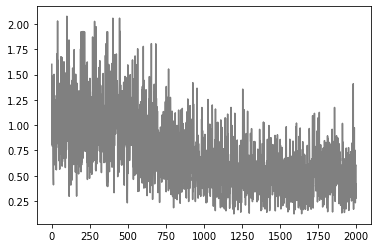

In [25]:
plt.plot(history, color='gray')

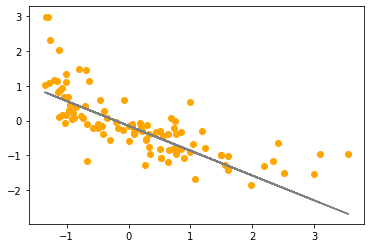

In [26]:
plt.scatter(x = X_test, y = y_test, color='orange')
values = np.column_stack((X_test, predictions))
plt.plot(values[:, 0], values[:, 1], color='gray')

plt.show()

In [27]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'Momentum Model Prediction': predictions.flatten(),
})

,Actual Value,Momentum Model Prediction
0,-0.221246,-0.679433
1,-1.842924,-1.564341
2,-0.993992,-1.215984
3,-1.081062,-0.530280
4,-0.145059,0.159427
...,...,...
97,0.268523,0.133400
98,-0.330083,-0.752508
99,-0.286548,-0.515265
100,-0.776317,-1.031795
